### Machine Learning with Tree-Based Models in Python

## Chapters

* Classification and Regression Trees
* The Bias-Variance Tradeoff
* Bagging and Random Forests
* Boosting
* Model Tuning


### Datasets

* [Wisconsin Breast Cancer](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)
* [Auto-mpg](https://www.kaggle.com/uciml/autompg-dataset)
* [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand)
* [Indian Liver Patient](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset)

In [1]:
# Packages
import pandas as pd # Import Pandas: a library for tabular data
import numpy as np # Import NumPy: a library for numerical operations

#Import plotting libraries: matplotlib and seaborn
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('tableau-colorblind10') #Set ggplot for graphs

#Import request library for downloand the data
import requests

%matplotlib inline

In [2]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
#In case that you dont have the folder, run this.
# Python program to explain os.mkdir() method  
    
# importing os module  
import os 
  
# Directory 
directory = "datasets"
  
# Parent Directory path 
parent_dir = "."
  
# Path 
path = os.path.join(parent_dir, directory) 
  
# Create the directory 
# 'datasets' in 
# 'current directory' 
os.mkdir(path) 
print("Directory '%s' created" %directory) 

In [3]:
cd ./datasets

C:\Users\DELL USER\GithubProjects\DataScienceProjects\Machine Learning with Tree-Based Models in Python (tutorial)\datasets


#### Obtaining datasets

In [4]:
def obtain_dataset(url):
    """Obtain a dataset from a url and put it on the current folder.
    
       Args url (String): url of the dataset
       
       Returns: Name of dataset downloaded
    """

    res = requests.get(url, allow_redirects=True)
    name = url.split('/')[-1]
    with open(name,'wb') as file:
        file.write(res.content)
    return  name 

In [5]:
# Breast Cancer
url = 'https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv'

name_cancer = obtain_dataset(url)

df_cancer = pd.read_csv(name_cancer)

In [6]:
# Auto-mpg
url = 'https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv'
name_auto = obtain_dataset(url)
df_auto = pd.read_csv(name_auto)

# Bike Sharing Demand
url = "https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv"
name_bikes = obtain_dataset(url)
df_bikes = pd.read_csv(name_bikes)


In [7]:
cd ..

C:\Users\DELL USER\GithubProjects\DataScienceProjects\Machine Learning with Tree-Based Models in Python (tutorial)


### Analyzing the Wisconsin Breast Cancer dataset

__Objetive__ Predict  is a tumor es benign or malignat using only Two features

In [58]:
df_cancer.head(6)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN


In [59]:
df_cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df_cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [11]:
df_cancer[df_cancer == 'NaN'].sum()

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
Unnamed:

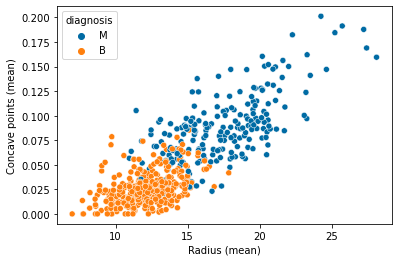

In [12]:
#hue_colors = {'M':,'B'}
sns.scatterplot(x = 'radius_mean', y = 'concave points_mean', data = df_cancer, hue = 'diagnosis', hue_order = ['M', 'B'])

plt.xlabel('Radius (mean)')
plt.ylabel('Concave points (mean)')
plt.show()

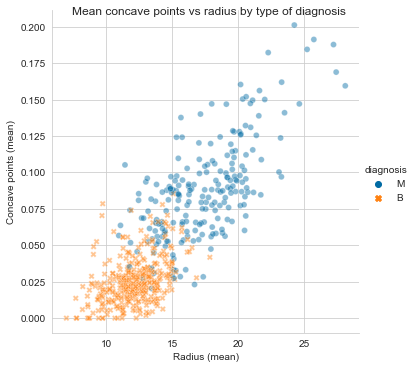

In [13]:
#hue_colors = {'M':,'B'}
sns.set_style('whitegrid')
g = sns.relplot(x = 'radius_mean', y = 'concave points_mean', data = df_cancer, hue = 'diagnosis', hue_order = ['M', 'B',], kind = "scatter", style = 'diagnosis', alpha = 0.45)
g.fig.suptitle('Mean concave points vs radius by type of diagnosis')
plt.xlabel('Radius (mean)')
plt.ylabel('Concave points (mean)')

plt.show()

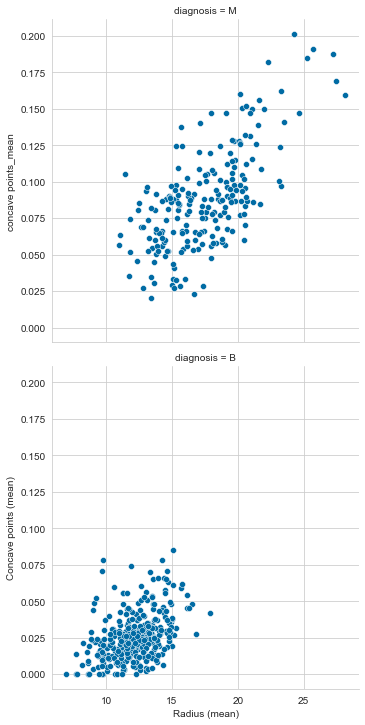

In [14]:
#hue_colors = {'M':,'B'}
sns.relplot(x = 'radius_mean', y = 'concave points_mean', data = df_cancer, row = 'diagnosis', hue_order = ['M', 'B',], kind = "scatter")

plt.xlabel('Radius (mean)')
plt.ylabel('Concave points (mean)')
plt.show()

#### Tree in Scikit-learn

In [60]:
X  = df_cancer[['radius_mean', 'concave points_mean']]
y = df_cancer['diagnosis'].map({'B':0, 'M':1})

In [65]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [49]:
#Dont run
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encode = le.fit_transform(y)


In [62]:
#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

#import train_test_split
from sklearn.model_selection import train_test_split

#import accuracy score
from sklearn.metrics import accuracy_score

In [63]:
# split dataset into 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

#Inicializate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

#Fit dt to the training
dt.fit(X_train, y_train)

#Predict test set labels
y_pred = dt.predict(X_test)

# Evaluate test-set accuracy
accuracy_score(y_test, y_pred)

0.9035087719298246

* Class 1 Malign
* Class 0 Benign

In [68]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt_2 = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt_2.fit(X_train, y_train)

# Predict test set labels
y_pred = dt_2.predict(X_test)
print(y_pred[0:5])

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

[0 0 0 1 0]
Test set accuracy: 0.89


#### Logistic regression vs classification tree

In [20]:
# We want import "from mlxtend.plotting import plot_decision_regions"
!pip install mlxtend  

AttributeError: 'list' object has no attribute 'predict'

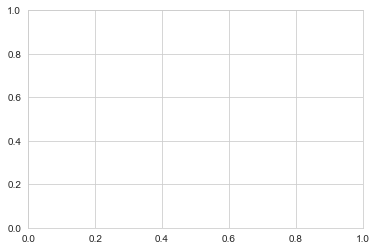

In [70]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import  LogisticRegression
from mlxtend.plotting import plot_decision_regions


# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt_2]

# Review the decision regions of the two classifiers
plot_decision_regions(np.array(X_test), np.array(y_test), clfs)

Notice how the decision boundary produced by logistic regression is linear while the boundaries produced by the classification tree divide the feature space into rectangular regions.

##### Using gini as a criterion 

In [71]:
# split dataset into 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

#Inicializate dt
dt = DecisionTreeClassifier(criterion = 'gini', random_state=1)

#Fit dt to the training
dt.fit(X_train, y_train)

#Predict test set labels
y_pred = dt.predict(X_test)

# Evaluate test-set accuracy
accuracy_gini =  accuracy_score(y_test, y_pred)
accuracy_gini

0.9210526315789473

#### Using entropy as a criterion

In [72]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [73]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

y_pred = dt_gini.predict(X_test)

# Evaluate test-set accuracy
accuracy_gini =  accuracy_score(y_test, y_pred)

#### Entropy vs Gini index

In [74]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.8859649122807017
Accuracy achieved by using the gini index:  0.9210526315789473


#### Ensemble Learning Breast Cancer

In [75]:
#import train_test_split
from sklearn.model_selection import train_test_split

#import accuracy score
from sklearn.metrics import accuracy_score

#import models including Voting-Classifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [76]:
#Set seed for reproducibility
SEED = 1

# split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

#Instatiate indiviudal classiffiers
lr = LogisticRegression(random_state = SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state = SEED)

#Define a list called classifier that contains the tuples (classifier_name,classifiert)
classifiers = [('Logistic Regression', lr),('K Nearest Neighbours', knn),('Classification Tree', dt)]

# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    
    #Predict the labels of test set
    y_pred = clf.predict(X_test)
    
    #Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test,y_pred)))

Logistic Regression : 0.848
K Nearest Neighbours : 0.883
Classification Tree : 0.901


In [77]:
#Instatiate voting classifier
vc = VotingClassifier(estimators = classifiers)

# Fit 'vc' to the training set and predict test set labels
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

#Evaluate the test set accuracy of vc
print('Voting classifier: {:.3f}'.format(accuracy_score(y_test,y_pred)))

Voting classifier: 0.895


#### Bagging Classifier with Brest-Cancer-Dataset

In [78]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import train_test_split

In [80]:
# Set seed for reproducibility
SEED = 1

#Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y ,random_state = SEED)

#Instatiate a classification-tree dt
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16, random_state=SEED)

#Instatiate a BaggingClassifier bc
bc = BaggingClassifier(base_estimator = dt, n_estimators=300, n_jobs=-1)

# Fit bc to the trainning set
bc.fit(X_train, y_train)

#Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test_set accuracy
accuracy = acc(y_test, y_pred)
print('Accuracy of Bagging Classifier: {:.3f}'.format(accuracy))

Accuracy of Bagging Classifier: 0.895


#### OOB Evaluation with Breast Cancer Dataset

In [88]:
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import train_test_split



In [90]:
# Set seed for reproducibility
SEED = 1

#Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y ,random_state = SEED)

#Instatiate a classification-tree dt
dt = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16, random_state=SEED)

#Instatiate a BaggingClassifier bc
bc = BaggingClassifier(base_estimator = dt, n_estimators=300, oob_score = True ,n_jobs=-1)

# Fit bc to the trainning set
bc.fit(X_train, y_train)

#Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate and print test_set accuracy
test_accuracy = acc(y_test, y_pred)

#Extract the OOB accuracy from bc
oob_accuracy = bc.oob_score_

#Print test set accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))

Test set accuracy: 0.877


In [91]:
# Print OOB accuracy
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

OOB accuracy: 0.915


#### Adabost Classification Breast Cancer dataset

In [187]:
# Import models and utility functions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [191]:
# Set seed for reproducibility
SEED = 1

# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, stratify = y, random_state = SEED)

In [194]:
# Instatiate a classifier-tree dt
dt = DecisionTreeClassifier(max_depth=1, random_state = SEED)

# Instatiate a AdaBoostClassifier
adb_clf = AdaBoostClassifier(base_estimator = dt, n_estimators = 100)

#Fit adb_clf to the training set
adb_clf.fit(X_train, y_train)

#Predict the test set probability  of position class
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]

#Evaluate test set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

In [195]:
# Print adb_clf_roc_auc_score

print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.96


### Tuning a CART's Hyperparameters

In [68]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Set SEED to 1 for reproducibility
SEED = 1

# Instantiate a DecisionTreeClassifier dt
dt = DecisionTreeClassifier(random_state = SEED)


# Print out dt hyperparameters
print(dt.get_params())

# Import GridSearchCV()
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters params_dt 
params_dt = {'max_depth':[3,4,5,6] ,
            'min_samples_leaf': [0.04, 0.06, 0.08] ,
            'max_features': [0.2, 0.4, 0.6, 0.8]}

grid_dt = GridSearchCV(estimator = dt, param_grid = params_dt, scoring = 'accuracy', cv=10, n_jobs = -1 )

grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from grid_dt
best_hyperparams = grid_dt.best_params_

print('Best hyperameter:\n', best_hyperparams)
print()
#Extract best CV score from grid_dt
best_cv_score = grid_dt.best_score_
print('Best CV accuracy'.format(best_cv_score))
print()
# Extract the best estimator
best_model = grid_dt.best_estimator_

# Evaluate test set accuracy
test_acc = best_model.score(X_test, y_test)

# Print test set accuracy
print("Test set accuracy of best model:  {:.3f}".format(test_acc))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 1, 'splitter': 'best'}
Best hyperameter:
 {'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.06}

Best CV accuracy

Test set accuracy of best model:  0.904


### Analyzing auto-mpg datase

* Dataset with 6 features, characteristics of the car

__Objetive__ Predict  is mpg consumtion of a car given six features: mpg, disl, hp, weight, accel, origin, size

#### Decision tree for regression


In [78]:
df_auto.head(4)

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0


In [79]:
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


In [80]:
df_auto.columns

Index(['mpg', 'displ', 'hp', 'weight', 'accel', 'origin', 'size'], dtype='object')

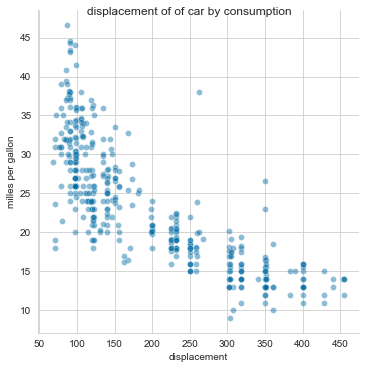

In [81]:
#hue_colors = {'M':,'B'}
sns.set_style('whitegrid')
g = sns.relplot(x = 'displ', y = 'mpg', data = df_auto, kind = "scatter", alpha = 0.45)
g.fig.suptitle('displacement of of car by consumption')
plt.ylabel('milles per gallon')
plt.xlabel('displacement')

plt.show()

In [82]:
X_car = np.array(df_auto['displ']).reshape(len(df_auto['displ']), 1)
y_car = np.array(df_auto['mpg']).reshape(len(df_auto['displ']), 1)

In [83]:
X_car

array([[250. ],
       [304. ],
       [ 91. ],
       [250. ],
       [ 97. ],
       [119. ],
       [108. ],
       [121. ],
       [302. ],
       [302. ],
       [ 97. ],
       [151. ],
       [135. ],
       [351. ],
       [400. ],
       [307. ],
       [ 79. ],
       [119. ],
       [ 71. ],
       [ 80. ],
       [225. ],
       [231. ],
       [302. ],
       [383. ],
       [140. ],
       [ 98. ],
       [144. ],
       [113. ],
       [231. ],
       [120. ],
       [168. ],
       [304. ],
       [140. ],
       [225. ],
       [107. ],
       [116. ],
       [302. ],
       [302. ],
       [ 98. ],
       [ 85. ],
       [ 81. ],
       [135. ],
       [351. ],
       [400. ],
       [ 98. ],
       [ 79. ],
       [119. ],
       [318. ],
       [ 98. ],
       [250. ],
       [383. ],
       [302. ],
       [113. ],
       [151. ],
       [ 98. ],
       [105. ],
       [232. ],
       [200. ],
       [232. ],
       [ 91. ],
       [ 71. ],
       [250. ],
       [

In [85]:
X_car.shape

(392, 1)

In [84]:
y_car.shape

(392, 1)

In [17]:
# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Import train_test_split
from sklearn.model_selection import train_test_split

#Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# split dataset into 80% train, 20% test

X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size = 0.2, random_state = 3)

#Inicializate a DecisionTreeRegressor dt_car

dt_car = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1,random_state=3) #min samples_ leaf At leat each leaf have a 0.10 of training data

# Fit dt_car to the training data
dt_car.fit(X_train, y_train)

#Predict test set labels
y_pred = dt_car.predict(X_test)

#Compute test-set MSE
mse_dt_car = MSE(y_test, y_pred)

rmse_dt_car = mse_dt_car**(1/2)
# print(rmse_dt)
print(rmse_dt_car)

5.102306888903137


In [18]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt_carb = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt_carb.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [19]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt_carb.predict(X_test)

# Compute mse_dt
mse_dt_carb = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt_carb = mse_dt_carb**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt_carb))

Test set RMSE of dt: 5.04


### Linear regression vs regression tree

### The Bias-Variance Tradeoff

#### K-fold CV in sklearn on the Auto dataset

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

#Set seed for reproducibility
SEED = 123

#Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size = 0.3, random_state = SEED)

#Instantiate decision tree regressor and assign it to dt
dt =  DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state = SEED)

#Evaluate the list of MSE  ontained by 10-fold CV
#Set n_jobs to -1 in order to exploit  all CPU cores in computation
MSE_CV = -cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)

#Fit 'dt' to the training set
dt.fit(X_train, y_train)

#Predict the labels of training set
y_predict_train = dt.predict(X_train)

#Predict the labels of test set
y_predict_test = dt.predict(X_test)

#CV MSE
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))


CV MSE: 19.94


In [21]:
#Training set MSE
print('Train MSE: {:.2f}'.format(MSE(y_train,y_predict_train)))
#Test set MSE
print('Train MSE: {:.2f}'.format(MSE(y_test,y_predict_test)))

Train MSE: 17.89
Train MSE: 20.41


#### Another Example: Instantiate the model

* Import train_test_split from sklearn.model_selection.
* Split the data into 70% train and 30% test.
* Instantiate a DecisionTreeRegressor with max depth 4 and min_samples_leaf set to 0.26.

In [22]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

#### Evaluate the 10-fold CV error

* Compute dt's 10-fold cross-validated MSE by setting the scoring argument to 'neg_mean_squared_error'.

* Compute RMSE from the obtained MSE scores.

In [23]:
# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs = -1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.09


#### Evaluate the training error

* Import mean_squared_error as MSE from sklearn.metrics.
* Fit dt to the training set.
* Predict dt's training set labels and assign the result to y_pred_train.
* Evaluate dt's training set RMSE and assign it to RMSE_train

In [24]:
from sklearn.metrics import mean_squared_error as MSE

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))



Train RMSE: 5.16


If we compare wit the first linear regressor
dt is indeed underfitting the training set as the model is too constrained to capture the nonlinear dependencies between features and labels

#### Random Forest Auto Dataset

In [86]:
X_c = df_auto['displ'].values.ravel().reshape(-1, 1)
y_c = df_auto['mpg'].values.ravel()

In [87]:
X_c = df_auto.drop('mpg', axis = 1)
y_c = df_auto['mpg'].values.ravel()

In [88]:
X_c = pd.get_dummies(X_c)

In [28]:
y_c.shape

(392,)

In [29]:
X_c.shape

(392, 8)

In [30]:
X_c

,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,250.0,88,3139,14.5,15.0,0,0,1
1,304.0,193,4732,18.5,20.0,0,0,1
2,91.0,60,1800,16.4,10.0,1,0,0
3,250.0,98,3525,19.0,15.0,0,0,1
4,97.0,78,2188,15.8,10.0,0,1,0
...,...,...,...,...,...,...,...,...
387,250.0,88,3021,16.5,15.0,0,0,1
388,151.0,90,2950,17.3,10.0,0,0,1
389,98.0,68,2135,16.6,10.0,1,0,0
390,250.0,110,3520,16.4,15.0,0,0,1


In [31]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#Set seed for reproducbility
SEED = 1

#Split dataset into 70% train adn 30% test
X_train, X_test, y_train, y_test = train_test_split(X_c, y_c, test_size=0.3, random_state=SEED)

# Instatiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12, random_state=SEED)

#Fit 'rf' to the training set
rf.fit(X_train,y_train)
#Predict the testset labels 'y_pred'
y_pred = rf.predict(X_test)

In [32]:
# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of: {:.2f}'.format(rmse_test))

Test set RMSE of: 3.98


#### Feature importance

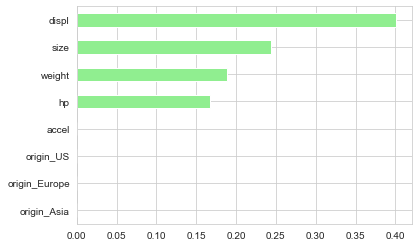

In [33]:
#Create a pd.Series of features importance
importances_rf = pd.Series(rf.feature_importances_ , index = X_c.columns)

#Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

#Make a horizontal bar plot
sorted_importances_rf.plot(kind = 'barh', color = 'lightgreen')
plt.show()

#### Gradient Bosting in sklearn (audo dataset)

In [34]:
# Import modesl and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

#Set seed for reproducibility
SEED = 1



In [35]:
#Split dataset into 70% train adn 30% test
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size=0.3, random_state=SEED)

In [36]:
X_train.shape

(274, 1)

In [37]:
y_train.shape

(274, 1)

In [38]:
X_test.shape

(118, 1)

In [39]:
y_test.shape

(118, 1)

In [40]:
# Instantiate a GradientBoostingRegressor gbt
gbt = GradientBoostingRegressor(n_estimators = 300, max_depth=1, random_state = SEED)

#Fit gbt to the training set
gbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = gbt.predict(X_test)

#Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

#print the test set RMSE
print('Test set: {:.2f}'.format(rmse_test))

Test set: 4.37


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Stochastic Gradient Boosting

In [42]:
# Imports models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Set seed for reproducibility
SEED = 1

# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size = 0.3, random_state=SEED)

In [46]:
# Instantiate a stochastic GradientBoostingRegressor sgbt
sgbt = GradientBoostingRegressor(max_depth=1, subsample=0.8, max_features=0.2, n_estimators = 300, random_state = SEED)

# Fit sbgt to the training set
sgbt.fit(X_train, y_train)

# Predict the test set labels
y_pred = sgbt.predict(X_test)

# Evaluate test set RMSE rmse_test
rmse_test = MSE(y_test, y_pred)**(1/2)

# print rmse_test
print('Test set RMSE: {:.2F}'.format(rmse_test))

Test set RMSE: 4.43


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [91]:
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_car, y_car, test_size = 0.3, random_state=SEED)

In [95]:
# Tuning Random Forest hyperparamerters
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate a random forest regressor rf
rf =  RandomForestRegressor(random_state = SEED)

# Impect rf hyperparams
print()
print(rf.get_params())
print()


# Basic Imports
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperameter params_rf
params_rf = {
    'n_estimators' : [300,400,500],
    'max_depth' : [4,6,8],
    'min_samples_leaf' : [0.1, 0.2],
    'max_features' : ['log2', 'sqrt']
}

#Instantiate grid_rf
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, scoring = 'neg_mean_squared_error', cv=3, n_jobs = -1 ,verbose = 1)

grid_rf.fit(X_train, y_train)

# Extract best hyperparameters from grid_dt
best_hyperparams = grid_rf.best_params_

print('Best hyperameter:\n', best_hyperparams)
print()
#Extract model from grid_rf
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))



{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   18.3s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best hyperameter:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 300}

Test set RMSE of rf: 4.17



###   Indian Liver Patient Dataset 

Objetive you'll instantiate three classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

In [69]:
path = "./datasets/indian_liver_patient_preprocessed.csv"
df_indian = pd.read_csv(path)

#### Define the ensemble

* Instantiate a Logistic Regression classifier and assign it to lr.

* Instantiate a KNN classifier that considers 27 nearest neighbors and assign it to knn.

* Instantiate a Decision Tree Classifier with the parameter min_samples_leaf set to 0.13 and assign it to dt.

In [70]:
#import train_test_split
from sklearn.model_selection import train_test_split

#import accuracy score
from sklearn.metrics import accuracy_score

#import models including Voting-Classifier meta-model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [71]:
df_indian.columns

Index(['Unnamed: 0', 'Age_std', 'Total_Bilirubin_std', 'Direct_Bilirubin_std',
       'Alkaline_Phosphotase_std', 'Alamine_Aminotransferase_std',
       'Aspartate_Aminotransferase_std', 'Total_Protiens_std', 'Albumin_std',
       'Albumin_and_Globulin_Ratio_std', 'Is_male_std', 'Liver_disease'],
      dtype='object')

In [72]:
df_indian.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      579 non-null    int64  
 1   Age_std                         579 non-null    float64
 2   Total_Bilirubin_std             579 non-null    float64
 3   Direct_Bilirubin_std            579 non-null    float64
 4   Alkaline_Phosphotase_std        579 non-null    float64
 5   Alamine_Aminotransferase_std    579 non-null    float64
 6   Aspartate_Aminotransferase_std  579 non-null    float64
 7   Total_Protiens_std              579 non-null    float64
 8   Albumin_std                     579 non-null    float64
 9   Albumin_and_Globulin_Ratio_std  579 non-null    float64
 10  Is_male_std                     579 non-null    int64  
 11  Liver_disease                   579 non-null    int64  
dtypes: float64(9), int64(3)
memory usage

In [73]:
df_indian.describe()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
count,579.000000,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,5.790000e+02,579.000000,579.000000
mean,291.257340,6.040073e-17,-4.630723e-17,1.730529e-16,9.683292e-18,-1.253076e-16,3.163848e-18,9.349650e-16,-1.016266e-16,-1.215685e-16,0.758204,0.715026
std,168.966657,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,1.000865e+00,0.428542,0.451792
min,0.000000,-2.516224e+00,-4.685332e-01,-4.954142e-01,-9.384212e-01,-3.886149e-01,-3.467356e-01,-3.489599e+00,-2.820182e+00,-2.026406e+00,0.000000,0.000000
25%,144.500000,-7.269589e-01,-4.042487e-01,-4.598784e-01,-4.761268e-01,-3.175862e-01,-2.949400e-01,-6.290394e-01,-6.784451e-01,-7.737285e-01,1.000000,0.000000
50%,292.000000,1.342668e-02,-3.721064e-01,-4.243426e-01,-3.425751e-01,-2.520212e-01,-2.362382e-01,1.091695e-01,-4.852253e-02,-5.343892e-02,1.000000,1.000000
75%,437.500000,8.155111e-01,-1.149683e-01,-6.898483e-02,2.726037e-02,-1.099638e-01,-8.085131e-02,6.628262e-01,8.333690e-01,4.789491e-01,1.000000,1.000000
max,582.000000,2.789873e+00,1.152053e+01,6.469598e+00,7.473282e+00,1.048424e+01,1.663878e+01,2.877453e+00,2.975106e+00,5.802829e+00,1.000000,1.000000


In [74]:
y_indian = df_indian.Liver_disease
X_indian = df_indian.drop('Liver_disease', axis = 1)

In [14]:
X_indian

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1
...,...,...,...,...,...,...,...,...,...,...,...
574,578,0.938909,-0.452462,-0.495414,0.857336,-0.333977,-0.263863,-0.536763,-1.938290,-1.807188,1
575,579,-0.295067,-0.436391,-0.495414,-0.794596,-0.252021,-0.274222,-0.444487,0.077462,0.478949,1
576,580,0.445318,-0.404249,-0.459878,-0.190532,-0.180993,-0.212067,-0.075383,0.077462,0.165780,1
577,581,-0.850356,-0.323893,-0.353271,-0.441198,-0.284804,-0.270769,0.293722,0.329431,0.165780,1


In [16]:
# Set seed for reproducibility
SEED=1

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

#### Evaluate individual classifiers

* Iterate over the tuples in classifiers. Use clf_name and clf as the for loop variables:
    * Fit clf to the training set.
    * Predict clf's test set labels and assign the results to y_pred.
* Evaluate the test set accuracy of clf and print the result.

In [17]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_indian, y_indian, test_size=0.3, random_state=SEED)

In [18]:
# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.764
K Nearest Neighbours : 0.724
Classification Tree : 0.730


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Notice how Logistic Regression achieved the highest accuracy of 76.4%.

#### Better performance with a Voting Classifier

* Import VotingClassifier from sklearn.ensemble.
* Instantiate a VotingClassifier by setting the parameter estimators to classifiers and assign it to vc.
* Fit vc to the training set.
* Evaluate vc's test set accuracy using the test set predictions y_pred.


In [19]:
# Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

Voting Classifier: 0.764


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Define the bagging classifier

__Objetive__ Your task is to predict whether a patient suffers from a liver disease using 10 features including Albumin, age and gender. You'll do so using a Bagging Classifier.

* Import DecisionTreeClassifier from sklearn.tree and BaggingClassifier from sklearn.ensemble.

* Instantiate a DecisionTreeClassifier called dt.

* Instantiate a BaggingClassifier called bc consisting of 50 trees.

In [20]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

#### Evaluate Bagging performance

In [21]:
# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_indian, y_indian, test_size=0.2, random_state=SEED)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.72


### OOB Evaluation

On average for each  model 63% of the training instances are sample
The remaining 37% constitute the OOB instances.

You can use this intances for model evaluation without use CV-cross validation

* Import BaggingClassifier from sklearn.ensemble.

* Instantiate a DecisionTreeClassifier with min_samples_leaf set to 8.

* Instantiate a BaggingClassifier consisting of 50 trees and set oob_score to True.

In [22]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8 ,random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

#### OOB Score vs Test Set Score

In [23]:
#Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_indian, y_indian, test_size = 0.2 ,random_state = SEED)

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))


Test set accuracy: 0.690, OOB accuracy: 0.676


#### Adabost

* Import AdaBoostClassifier from sklearn.ensemble.

* Instantiate a DecisionTreeClassifier with max_depth set to 2.

* Instantiate an AdaBoostClassifier consisting of 180 trees and setting the base_estimator to dt.

In [24]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

# Instantiate dt
dt = DecisionTreeClassifier(max_depth = 2, random_state=1)

# Instantiate ada
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

In [25]:
#Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_indian, y_indian, test_size = 0.2 ,random_state = SEED)


* Fit ada to the training set.

* Evaluate the probabilities of obtaining the positive class in the test set.

In [26]:
# Fit ada to the training set
ada.fit(X_train, y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

#### Evaluate the AdaBoost classifier

* Import roc_auc_score from sklearn.metrics.

* Compute ada's test set ROC AUC score, assign it to ada_roc_auc, and print it out.

In [27]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba )

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.64


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_indian, y_indian, test_size = 0.2 ,random_state = SEED)

In [77]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Set SEED to 1 for reproducibility
SEED = 1

# Instantiate a DecisionTreeClassifier dt
dt = DecisionTreeClassifier(random_state = SEED)


# Print out dt hyperparameters
print(dt.get_params())

# Import GridSearchCV()
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters params_dt 
# Define params_dt
params_dt =  {'max_depth':[2,3,4],
            'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]}

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

# Extract best hyperparameters from grid_dt
best_hyperparams = grid_dt.best_params_

# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 1, 'splitter': 'best'}
Test set ROC AUC score: 0.731


### Analizing Bike Sharing Demand 

__Objetive__ Predict bike rental demand in the Capital Bikeshare program in Washington, D.C using historical weather data from the Bike Sharing Demand dataset available through Kaggle using the random forests algorithm

In [47]:
path = './datasets/bikes.csv'

bikes = pd.read_csv(path)

In [48]:
bikes.columns

Index(['hr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'instant', 'mnth', 'yr', 'Clear to partly cloudy',
       'Light Precipitation', 'Misty'],
      dtype='object')

In [49]:
bikes.head()

,hr,holiday,workingday,temp,hum,windspeed,cnt,instant,mnth,yr,Clear to partly cloudy,Light Precipitation,Misty
0,0,0,0,0.76,0.66,0.0000,149,13004,7,1,1,0,0
1,1,0,0,0.74,0.70,0.1343,93,13005,7,1,1,0,0
2,2,0,0,0.72,0.74,0.0896,90,13006,7,1,1,0,0
3,3,0,0,0.72,0.84,0.1343,33,13007,7,1,1,0,0
4,4,0,0,0.70,0.79,0.1940,4,13008,7,1,1,0,0


In [50]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      1488 non-null   int64  
 1   holiday                 1488 non-null   int64  
 2   workingday              1488 non-null   int64  
 3   temp                    1488 non-null   float64
 4   hum                     1488 non-null   float64
 5   windspeed               1488 non-null   float64
 6   cnt                     1488 non-null   int64  
 7   instant                 1488 non-null   int64  
 8   mnth                    1488 non-null   int64  
 9   yr                      1488 non-null   int64  
 10  Clear to partly cloudy  1488 non-null   int64  
 11  Light Precipitation     1488 non-null   int64  
 12  Misty                   1488 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 151.2 KB


In [51]:
bikes.isna().sum()

hr                        0
holiday                   0
workingday                0
temp                      0
hum                       0
windspeed                 0
cnt                       0
instant                   0
mnth                      0
yr                        0
Clear to partly cloudy    0
Light Precipitation       0
Misty                     0
dtype: int64

In [52]:
X_bikes = bikes.drop('cnt', axis = 1)
y_bikes = bikes['cnt']

In [104]:
#Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, test_size = 0.2 ,random_state = SEED)


* Import RandomForestRegressor from sklearn.ensemble.

* Instantiate a RandomForestRegressor called rf consisting of 25 trees.

* Fit rf to the training set.

In [105]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

RandomForestRegressor(n_estimators=25, random_state=2)

#### Evaluate the RF regressor

* Import mean_squared_error from sklearn.metrics as MSE.
* Predict the test set labels and assign the result to y_pred.
* Compute the test set RMSE and assign it to rmse_test.

In [106]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test ,y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 51.84


#### Visualizing features importances

* Call the .sort_values() method on importances and assign the result to importances_sorted.

* Call the .plot() method on importances_sorted and set the arguments:

    * kind to 'barh'
    * color to 'lightgreen'

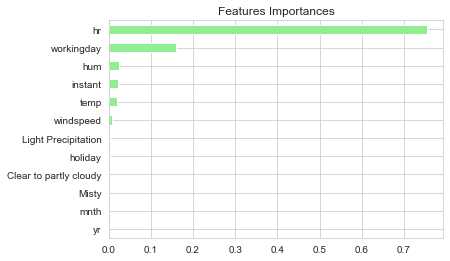

In [107]:
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.savefig('bikes.jpg')

Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%

#### GB regressor

* Import GradientBoostingRegressor from sklearn.ensemble.

* Instantiate a gradient boosting regressor by setting the parameters:

    * max_depth to 4

    * n_estimators to 200

In [109]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

#### Train the GB regressor

* Fit gb to the training set.
* Predict the test set labels and assign the result to y_pred.

In [111]:
#Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, test_size = 0.2 ,random_state = SEED)

In [112]:
# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred = gb.predict(X_test)

#### Evaluate the GB regressor

* Import mean_squared_error from sklearn.metrics as MSE.

* Compute the test set MSE and assign it to mse_test.

* Compute the test set RMSE and assign it to rmse_test.

In [113]:
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test,y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 43.113


### Regression with SGB

* Instantiate a Stochastic Gradient Boosting Regressor (SGBR) and set:

    * max_depth to 4 and n_estimators to 200,

    * subsample to 0.9, and

    * max_features to 0.75.
    
* Fit sgbr to the training set.
* Predict the test set labels and assign the results to y_pred.

* Compute test set MSE and assign the result to mse_test.
* Compute test set RMSE and assign the result to rmse_test.

In [57]:
#Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, test_size = 0.2 ,random_state = SEED)

In [54]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)


# Fit sbgt to the training set
sgbr.fit(X_train, y_train)

# Predict the test set labels
y_pred = sgbr.predict(X_test)

# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute test set MSE
mse_test =  MSE(y_test, y_pred)

# Compute test set RMSE
rmse_test = mse_test**(1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Test set RMSE of sgbr: 45.143


#### Tuning a RF Hyperparameters


In [96]:
#Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_bikes, y_bikes, test_size = 0.2 ,random_state = SEED)

In [97]:

# Tuning Random Forest hyperparamerters
from sklearn.ensemble import RandomForestRegressor

# Set seed for reproducibility
SEED = 1

# Instantiate a random forest regressor rf
rf =  RandomForestRegressor(random_state = SEED)

# Impect rf hyperparams
print()
print(rf.get_params())
print()


# Basic Imports
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

# Define the dictionary 'params_rf'
params_rf = {'n_estimators': [100,350,500],
'max_features' : ['log2', 'auto', 'sqrt'],
'min_samples_leaf' : [2,10,30]}

#Instantiate grid_rf
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, scoring = 'neg_mean_squared_error', cv=3, n_jobs = -1 ,verbose = 1)

grid_rf.fit(X_train, y_train)

# Extract best hyperparameters from grid_dt
best_hyperparams = grid_rf.best_params_

print('Best hyperameter:\n', best_hyperparams)
print()
#Extract model from grid_rf
best_model = grid_rf.best_estimator_

# Predict the test set labels
y_pred = best_model.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print the test set RMSE
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))



{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   22.7s finished


Best hyperameter:
 {'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 100}

Test set RMSE of rf: 51.78


In [ ]:
GridSearchCV